In [3]:
!pip install diffusers transformers accelerate scipy torch

In [5]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
# Load ControlNet model for sketch generation
controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_scribble", torch_dtype=torch.float16)

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [7]:
# Load Stable Diffusion with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
# Move to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe.to(device)

StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Enter the description for the sketch: A man with thick, wavy black hair swept back, revealing a strong forehead and well-defined cheekbones. His deep-set, piercing blue eyes are framed by thick, slightly furrowed eyebrows, giving him an intense yet approachable look. A straight, prominent nose sits perfectly between his features, while his full lips curve into a subtle smirk. His well-groomed stubble enhances his rugged charm, complementing his sharp jawline. His smooth, tanned skin contrasts with the soft lighting, emphasizing the contours of his athletic build. He wears a fitted black turtleneck, adding to his aura of quiet confidence and sophistication.


Token indices sequence length is longer than the specified maximum sequence length for this model (135 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['omed stubble enhances his rugged charm , complementing his sharp jawline . his smooth , tanned skin contrasts with the soft lighting , emphasizing the contours of his athletic build . he wears a fitted black turtleneck , adding to his aura of quiet confidence and sophistication .']


  0%|          | 0/50 [00:00<?, ?it/s]

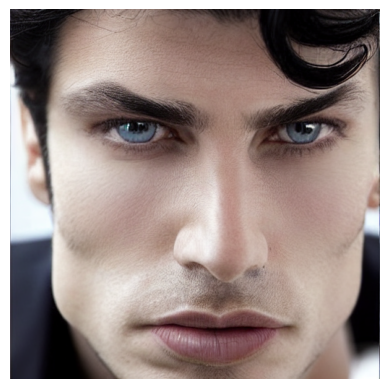

In [11]:
# Function to create a blank canvas
def create_blank_image(size=(512, 512), color=(255, 255, 255)):
    """Creates a blank white image to use as the base for sketching."""
    return Image.fromarray(np.full((size[1], size[0], 3), color, dtype=np.uint8))

# Get user input for description
text_prompt = input("Enter the description for the sketch: ")

# Create a blank input sketch
input_sketch = create_blank_image()

# Generate sketch
image = pipe(prompt=text_prompt, image=input_sketch).images[0]

# Show the image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()